In [1]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Cargar los datos

In [2]:
df = pd.read_csv('data.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Encontrar los valores basicos de cada columna numerica, como la media, la mediana, la desviacion estandar, el minimo y el maximo

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


Se puede ver que no existen valores nulos en los datos, entonces no se tiene necesidad de hacer una limpieza de nulos

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Se puede notar que hay varias variables categoricas en el dataset

Vamos a conseguir nuestras variables categoricas y numericas, para graficarlas y ver como se comportan

In [6]:
numeric = []
for col in df.columns:
    if df[col].dtype != 'O':
        numeric.append(col)

print(f"Varaibles numericas: {numeric}")

categorical = []
for col in df.columns:
    if df[col].dtype == 'O':
        categorical.append(col)

print(f"Variables categoricas: {categorical}")

Varaibles numericas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Variables categoricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


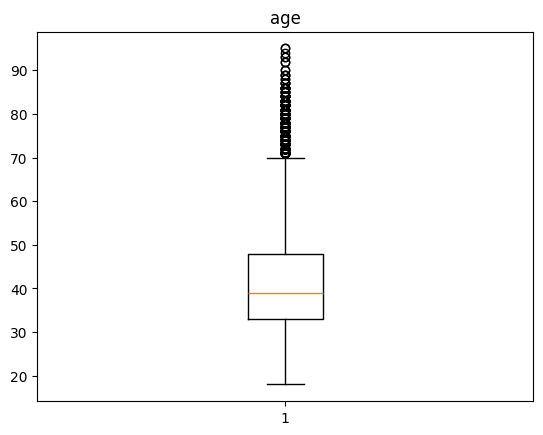

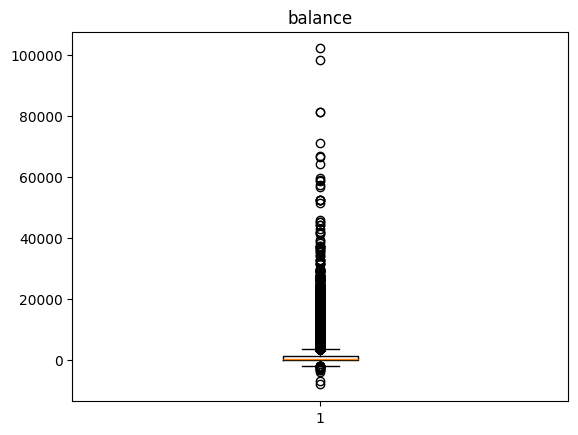

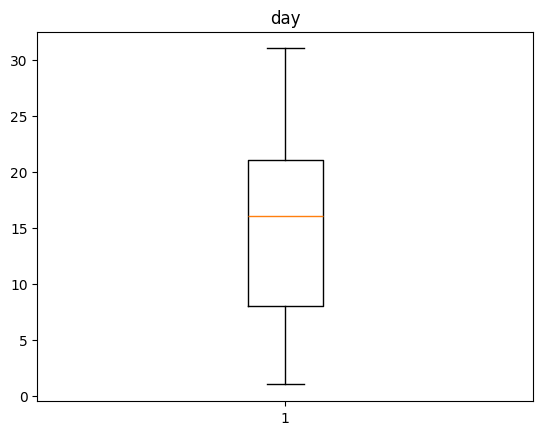

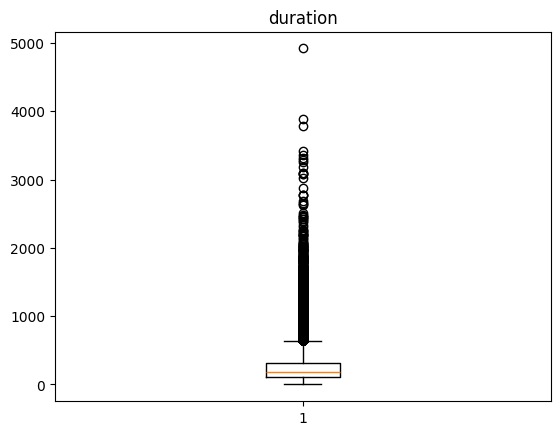

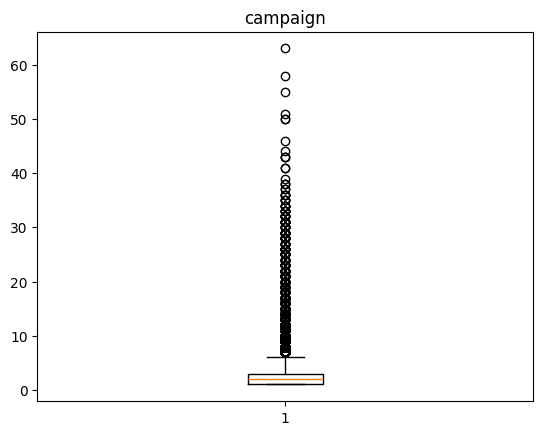

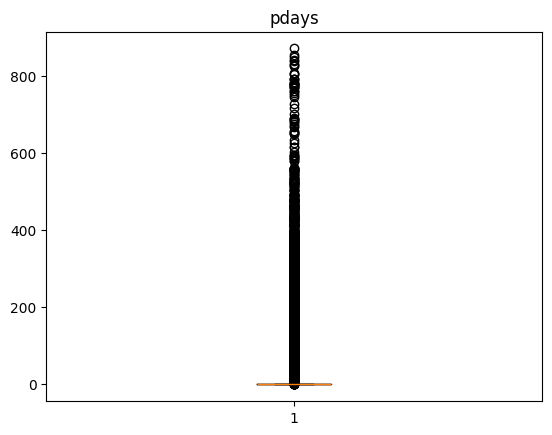

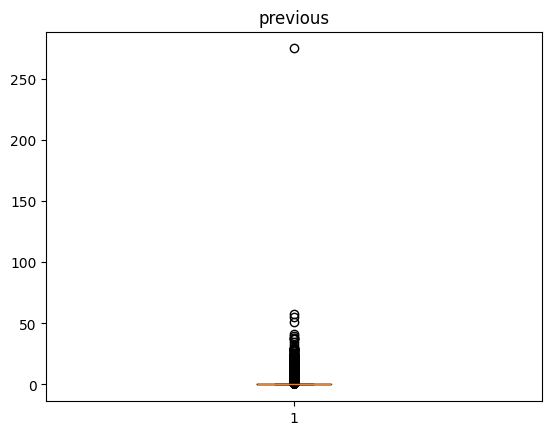

In [7]:
for num in numeric:
    plt.boxplot(df[num])
    plt.title(num)
    plt.show()

Vamos a ver cuantos outliers tenemos en cada una de nuestras columnas numericas

In [8]:
for num in numeric:
    iqr = df[num].quantile(0.75) - df[num].quantile(0.25)
    print(f"Numero outliers de {num} es: {(df[num] > df[num].quantile(0.75) + 1.5 * iqr).sum() + (df[num] < df[num].quantile(0.25) - 1.5 * iqr).sum()}")

Numero outliers de age es: 487
Numero outliers de balance es: 4729
Numero outliers de day es: 0
Numero outliers de duration es: 3235
Numero outliers de campaign es: 3064
Numero outliers de pdays es: 8257
Numero outliers de previous es: 8257


Podemos notar que tenemos muchos outliers en nuestras columnas, aunque con respecto a el tamaño de nuestro dataset, no es un numero tan grande.
El problema es que en columnas como la edad, si que nos interesa guardar los outliers, puesto que existe la posibilidad de que la gente de mayor edad tienda a nunca abrir un CDT, o la gente con mucho dinero en la cuenta si que tienda a abrir un CDT.
<br>
Aun asi notemos que en nuestra columna de `previous` si que hay un valor ya muy extremo, ese si que va a ser eliminado 100%

De igual manera, vamos a calcular el numero de valores extremos (3IQR)

In [9]:
for num in numeric:
    iqr = df[num].quantile(0.75) - df[num].quantile(0.25)
    print(f"Numero valores extremos de {num} es: {(df[num] > df[num].quantile(0.75) + 3 * iqr).sum() + (df[num] < df[num].quantile(0.25) - 3 * iqr).sum()}")

Numero valores extremos de age es: 3
Numero valores extremos de balance es: 2443
Numero valores extremos de day es: 0
Numero valores extremos de duration es: 1155
Numero valores extremos de campaign es: 1462
Numero valores extremos de pdays es: 8257
Numero valores extremos de previous es: 8257


Algo que podemos notar sabiendo el contexto de nuestro dataset, es que la columna `previous`  y  `pdays` son columnas en las que tienen muchos extremos debido a que la gran mayoria de las personas contactadas, son contactadas por primera vez, por ende el valor de `pdays` es -1 y `previous` es 0.
<br>
Esto tambien se puede comprobar revisando los cuartiles de estas variables.

Adicionalmente, vamos a mirar que distribucion tienen nuestras variables numericas

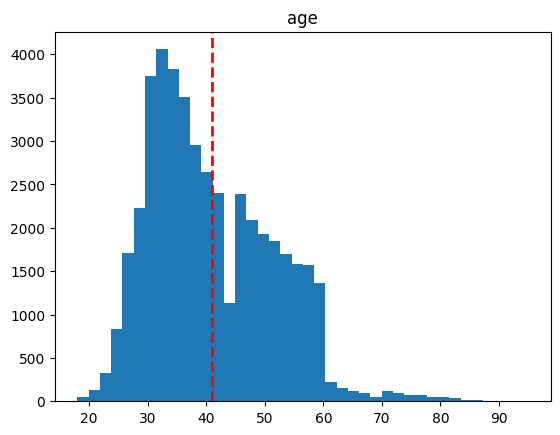

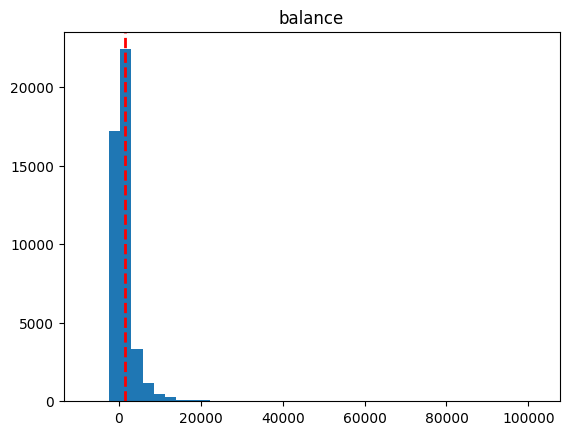

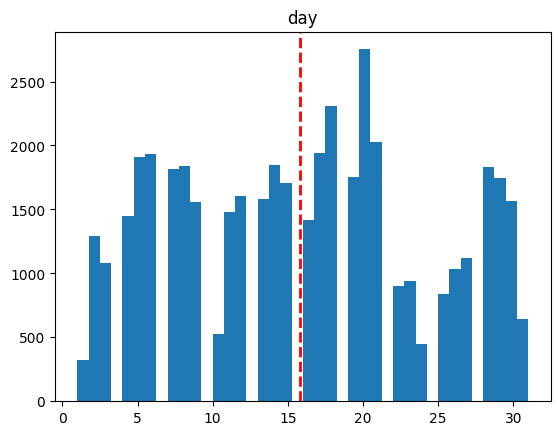

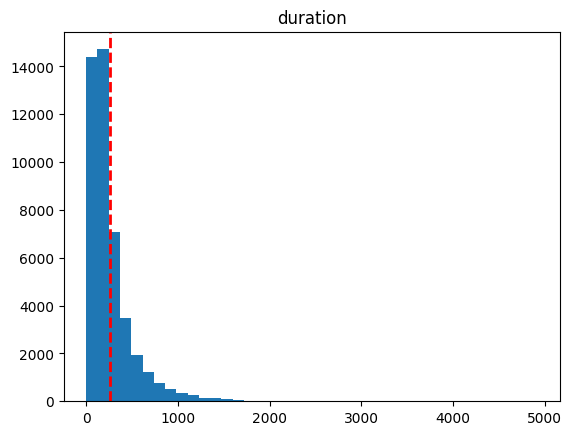

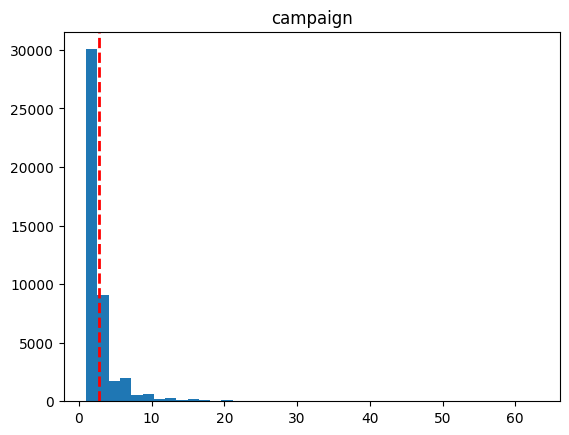

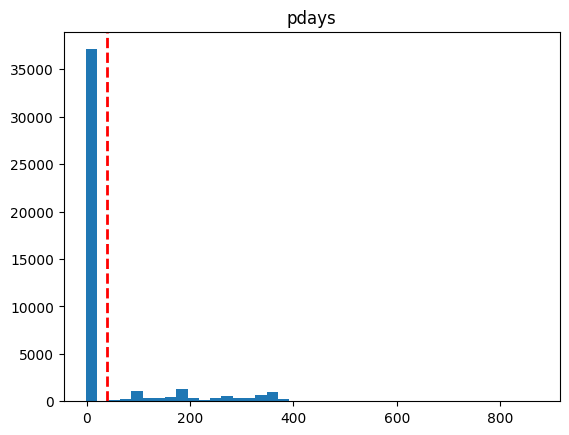

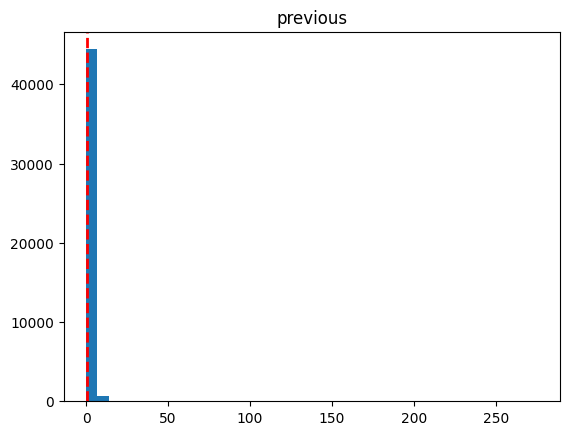

In [10]:
for num in numeric:
    plt.hist(df[num], bins = 40)
    plt.axvline(x=df[num].mean(), color='r', linestyle='dashed', linewidth=2)  # La media
    plt.title(num)
    plt.show()

A pesar de que la columna previous no se puede ver muy bien en el grafico, no importa ya que por la naturaleza del problema escogido, esta columna se va a desechar de igual manera

### variables categoricas

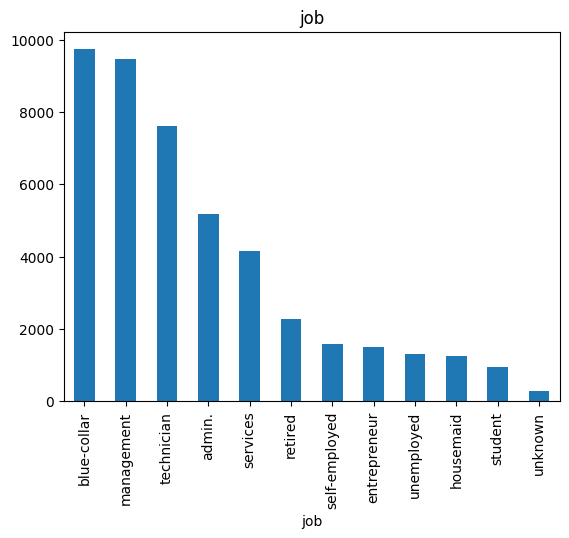

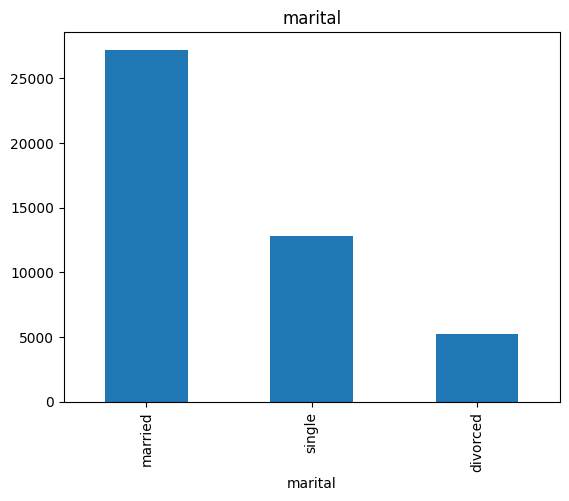

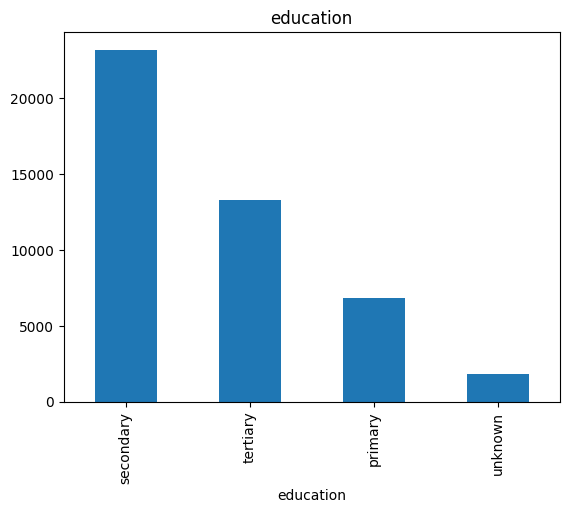

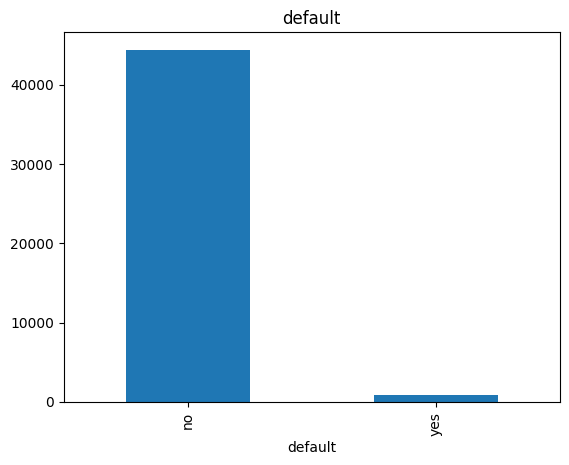

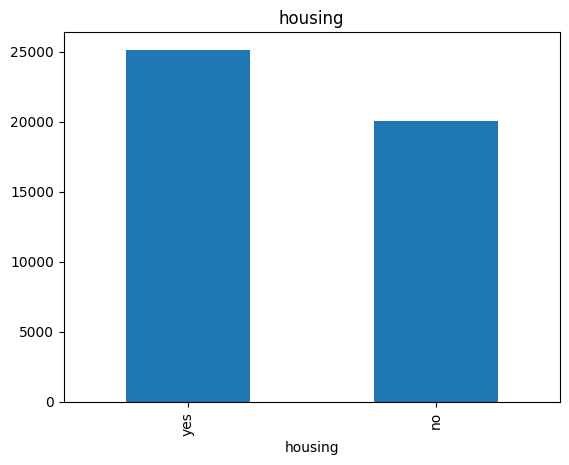

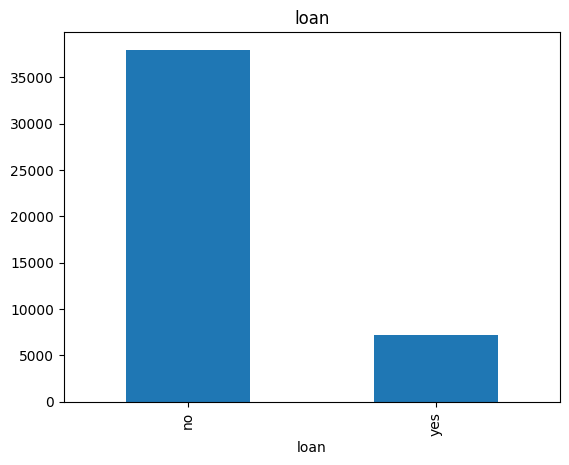

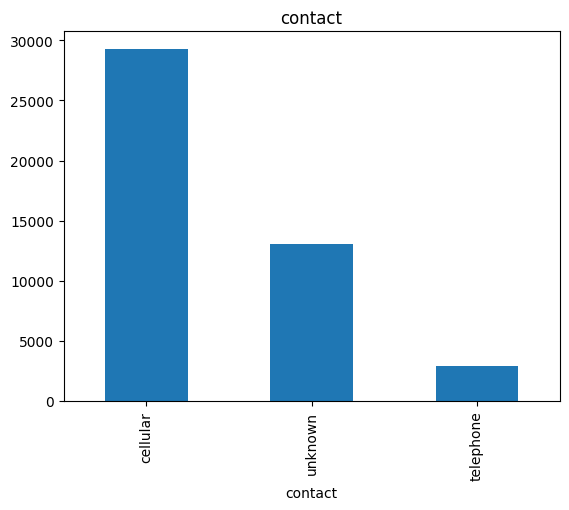

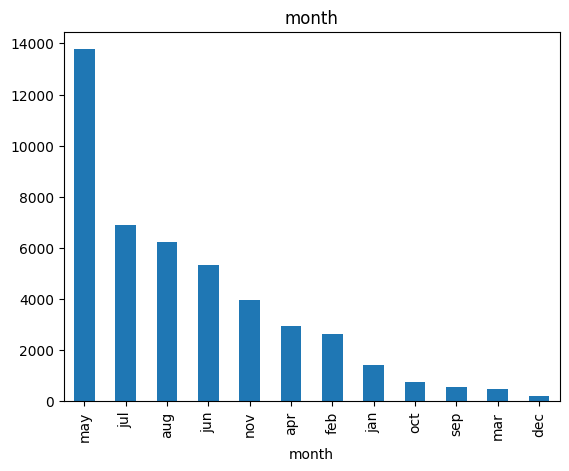

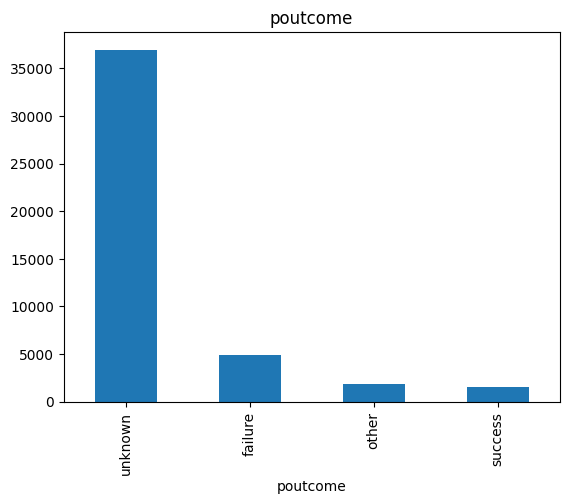

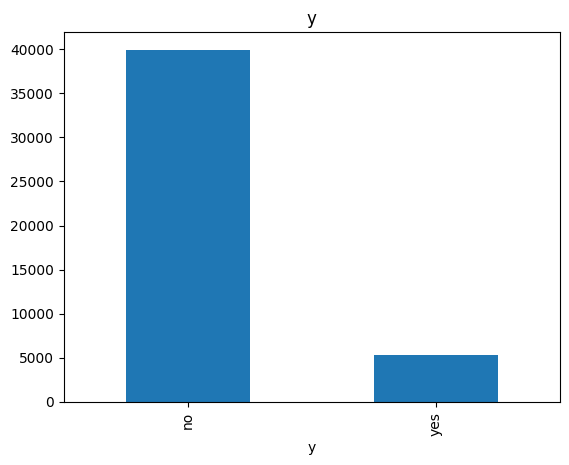

In [11]:
for cat in categorical:
    df[cat].value_counts().plot(kind='bar')
    plt.title(cat)
    plt.show()

Podemos notar cosas como que:
- a simple vista se puede ver que los trabajadores manuales, los gerente y los tecnicos representan poco mas de la mitad de todos los contactados.
- Mas de la mitad de los contactados son casados.
- Mas o menos la mitad solo llegaron al bachillerato
- Casi ningun contactado ha incumplido en la deuda
- La mayoria de los contactados no tienen ningun prestamo
- Mucho mas de la mitad de los contactados fueron por medio del celular
- En mayo se hacen mas o menos el doble de llamadas (o contactos pues) que en el siguiente mes
- casi no se sabe ningun resultado de las campañas anteriores de marketing
- Solo el 12% (medido a ojo) de los contactos resultan en que los clientes abran un CDT en el banco

### Relaciones entre variables con nuestro target

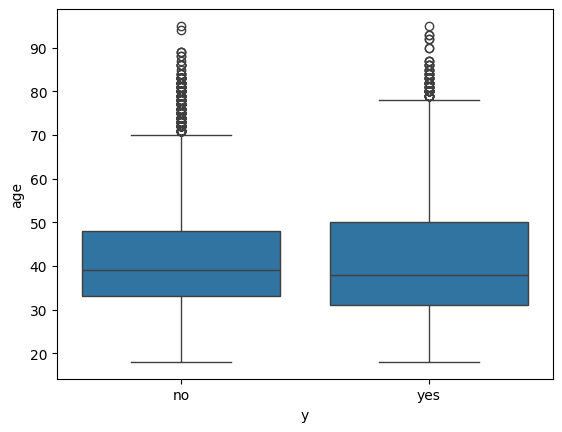

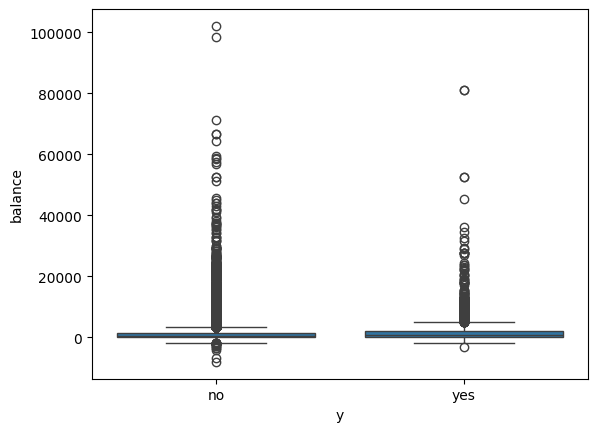

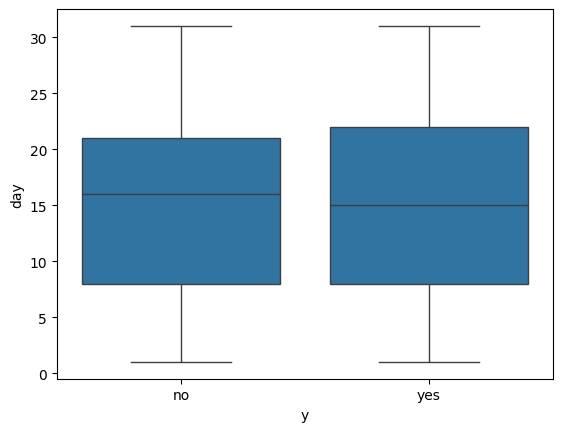

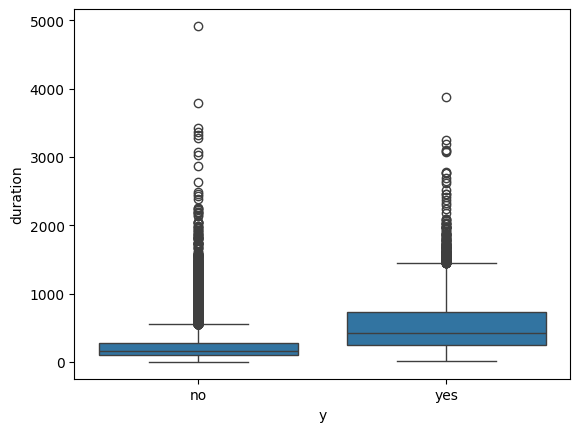

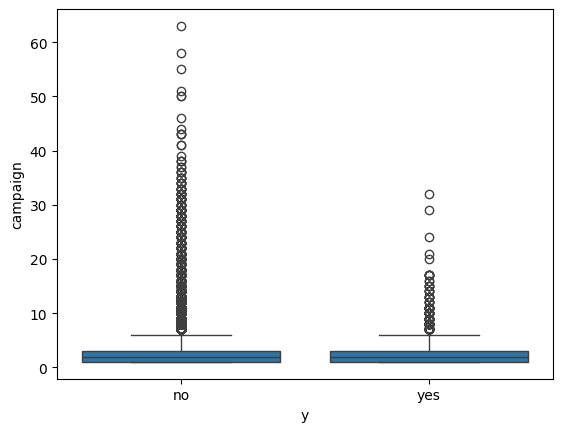

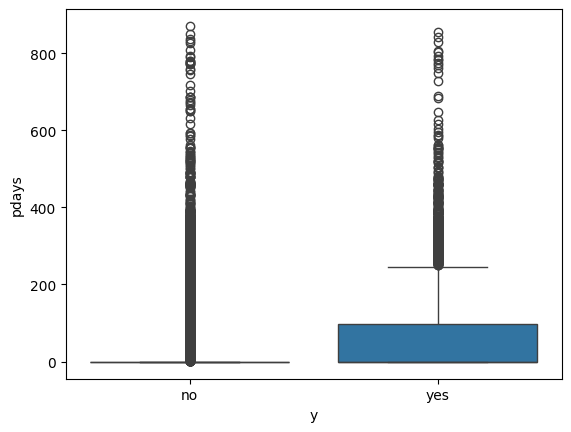

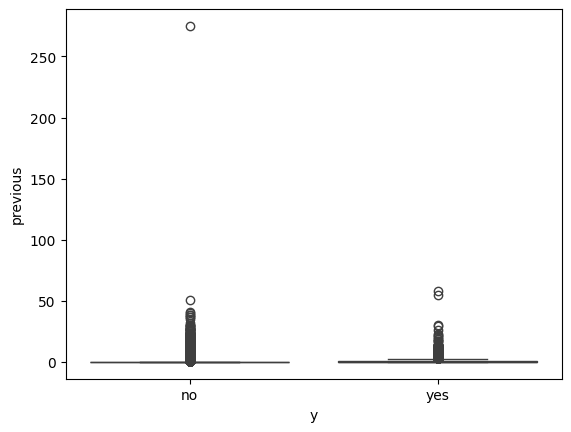

In [12]:
for num in numeric:
    sn.boxplot(x='y', y=num, data=df)
    plt.show()

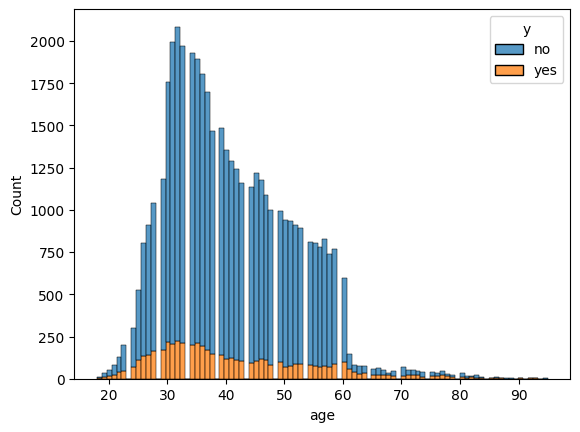

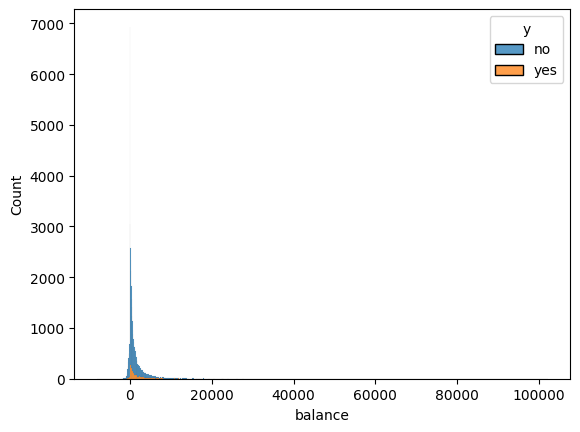

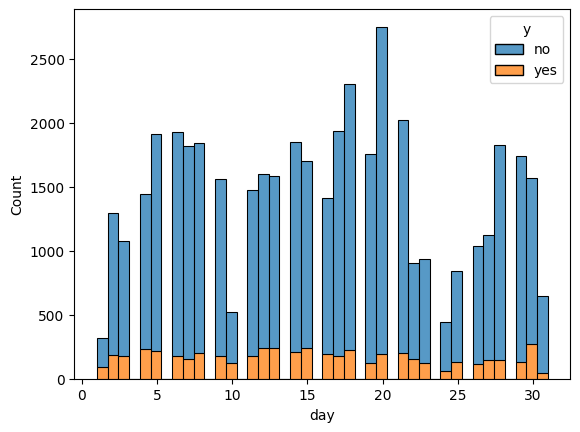

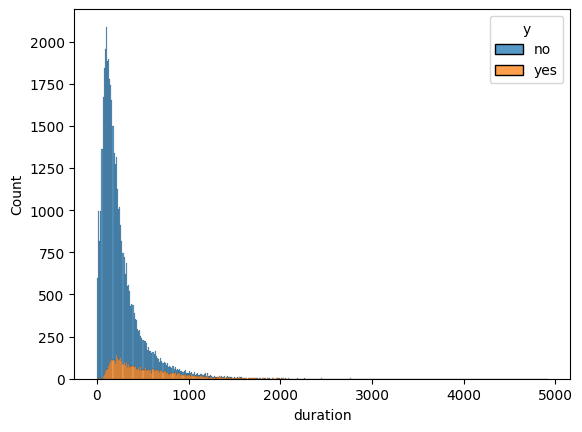

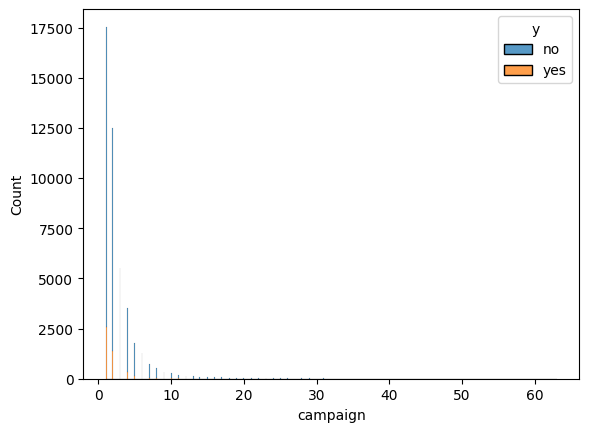

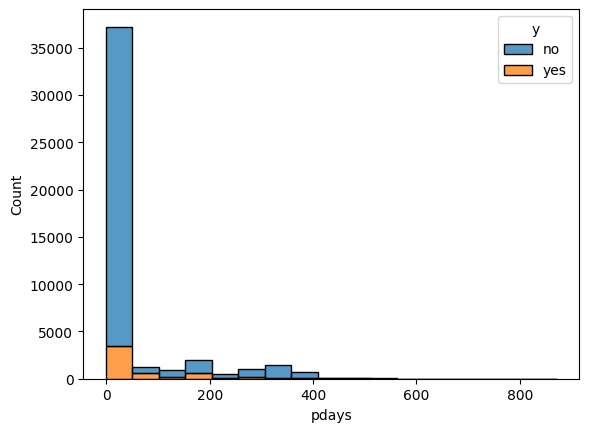

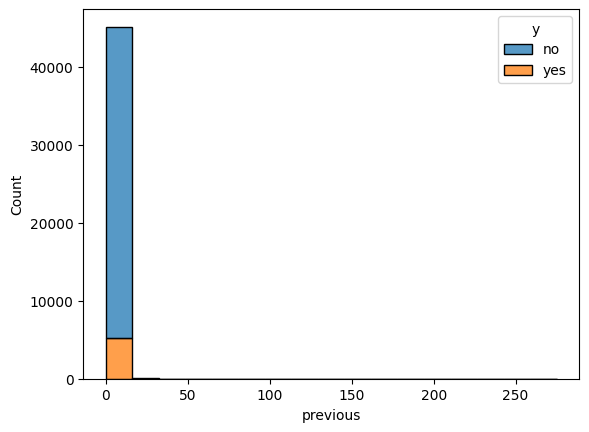

In [13]:
for num in numeric:
    sn.histplot(df, x=num, hue='y', multiple='stack')
    plt.show()

Algo notable es que las personas jovenes y las personas mayores son en porcentaje de contactadas, las que mas tienden a abrir un CDT.

Ahora las variables categoricas

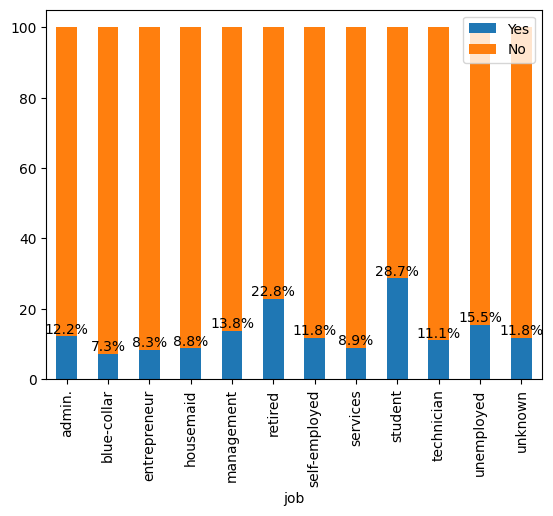

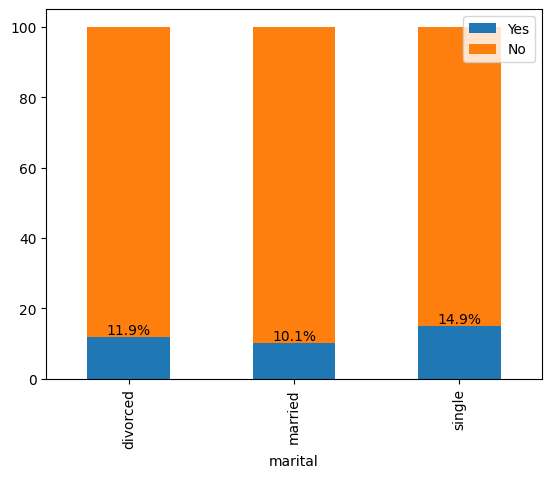

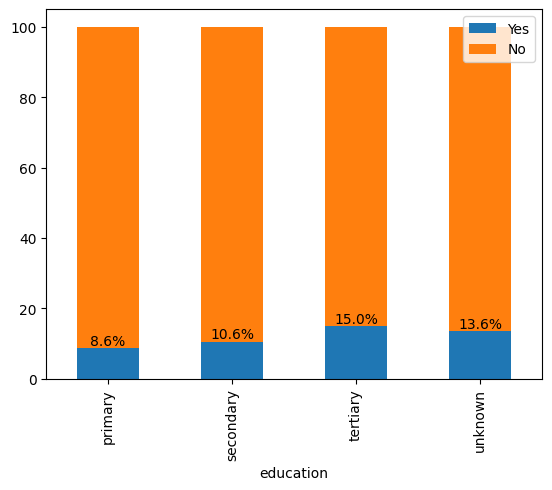

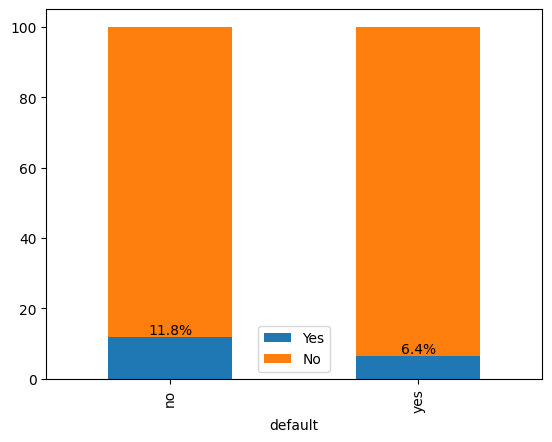

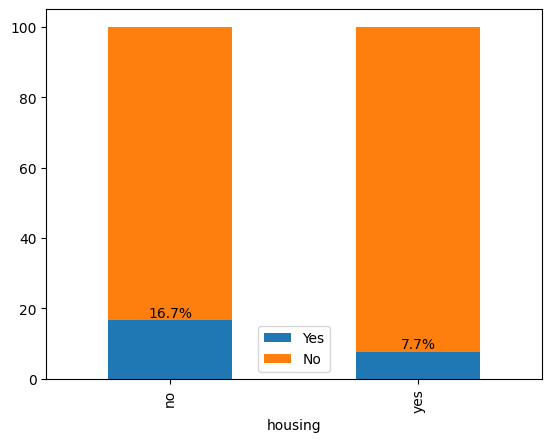

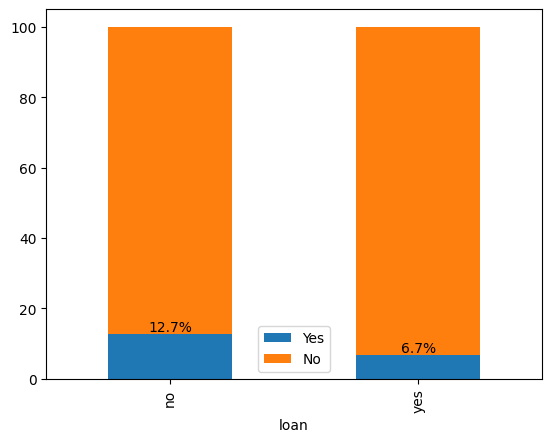

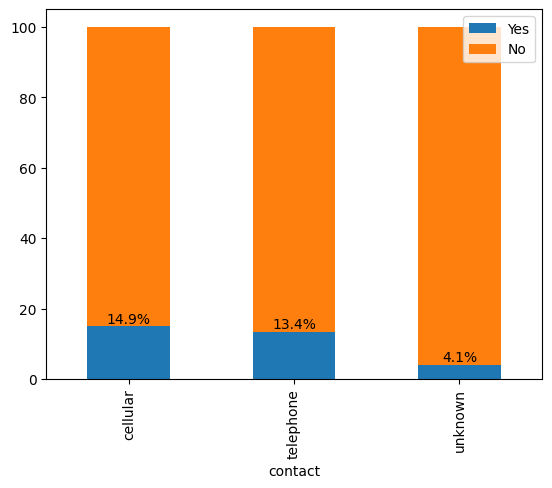

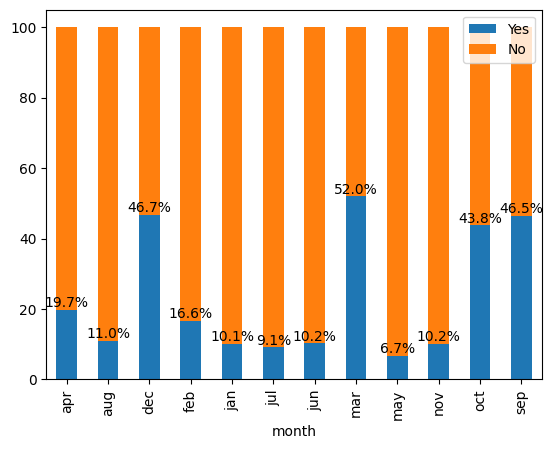

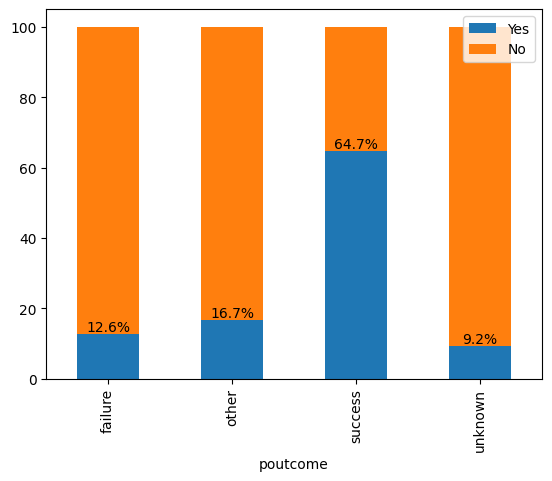

In [14]:
for cat in categorical:
    if cat == 'y': continue

    agg_df = df.groupby(cat).agg(
        total=('y', 'count'),
        p_yes=('y', lambda x: (x=='yes').sum()),
        p_no=('y', lambda x: (x=='no').sum())
    )

    agg_df['p_yes'] = agg_df['p_yes'] * 100 / agg_df['total']
    agg_df['p_no'] = agg_df['p_no'] * 100 / agg_df['total']

    plot = agg_df[['p_yes', 'p_no']].plot(kind='bar', stacked=True)
    plt.xticks(rotation='vertical')

    for i, val in enumerate(agg_df['p_yes'].values):
        plt.text(i, val, f"{round(agg_df['p_yes'].values[i], 1)}%", ha='center', va='bottom')

    plot.legend(['Yes', 'No'])
    plt.show()

Podemos notar cosas interesantes, como :
- los clientes que han accedido a un producto del banco anteriormente, son muchisimo mas propensos a abrir un CDT. 
- las personas que no tienen prestamos de bienes raices son mas del doble de probables de abrir un cdt que las personas que cuentan con estos prestamos.
- el modo de contacto no aparenta ser un factor a tener en cuenta, esto debido a que las probabilidades de abrir un CDT son muy similares en ambos modos de contacto